In [85]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.linear_model import Ridge
import os
import random
import warnings
warnings.filterwarnings("ignore")

In [86]:
### version control name
version_control_name="1"

### loading the pool of predictions

In [87]:
def clean_path(path,target = '.csv'):
    for s in path:
        if s[-4:]!=target:
            path.remove(s)
    return path

In [88]:
IS_path = "../data/stacking_IS/"
OS_path = "../data/stacking_OS/"
output_path = "./stacking_outputs"
all_is_files = os.listdir(IS_path)
all_os_files = os.listdir(OS_path)
all_is_files = clean_path(all_is_files)
all_os_files = clean_path(all_os_files)
print("stacking "+str(len(all_is_files))+" files.")

stacking 17 files.


In [89]:
all_is_files.sort()
all_os_files.sort()
for k in range(len(all_is_files)):
    print(all_is_files[k],all_os_files[k])

IS_prediction_cat_10,10.csv OS_prediction_cat_10,10.csv
IS_prediction_cat_10,20.csv OS_prediction_cat_10,20.csv
IS_prediction_cat_10,5.csv OS_prediction_cat_10,5.csv
IS_prediction_cat_10,50.csv OS_prediction_cat_10,50.csv
IS_prediction_cat_split_type_final.csv OS_prediction_cat_split_type_final.csv
IS_prediction_cat_split_type_final2.csv OS_prediction_cat_split_type_final2.csv
IS_prediction_dt_1.csv OS_prediction_dt_1.csv
IS_prediction_lgb_10,100.csv OS_prediction_lgb_10,100.csv
IS_prediction_lgb_10,20.csv OS_prediction_lgb_10,20.csv
IS_prediction_lgb_10,40.csv OS_prediction_lgb_10,40.csv
IS_prediction_lgb_10,60.csv OS_prediction_lgb_10,60.csv
IS_prediction_lgb_split_type_final.csv OS_prediction_lgb_split_type_final.csv
IS_prediction_xgb_10,20.csv OS_prediction_xgb_10,20.csv
IS_prediction_xgb_10,40.csv OS_prediction_xgb_10,40.csv
IS_prediction_xgb_10,60.csv OS_prediction_xgb_10,60.csv
IS_prediction_xgb_split_type_final.csv OS_prediction_xgb_split_type_final.csv
IS_randomforest_pred_1.c

In [90]:
concat_sub = pd.DataFrame([])

for k in range(1,len(all_is_files)+1):
    f = all_is_files[k-1]
    out = pd.read_csv(os.path.join(IS_path, f))
    out.columns=["stack_"+str(k)]
    concat_sub = pd.concat([concat_sub,out],axis = 1)

print(concat_sub.shape[1])
a = concat_sub.corr()
print(a)

17
           stack_1   stack_2   stack_3   stack_4   stack_5   stack_6  \
stack_1   1.000000  0.992913  0.992966  0.992458  0.979258  0.973886   
stack_2   0.992913  1.000000  0.992723  0.992464  0.979375  0.973701   
stack_3   0.992966  0.992723  1.000000  0.992467  0.979669  0.974017   
stack_4   0.992458  0.992464  0.992467  1.000000  0.981784  0.976144   
stack_5   0.979258  0.979375  0.979669  0.981784  1.000000  0.988577   
stack_6   0.973886  0.973701  0.974017  0.976144  0.988577  1.000000   
stack_7   0.933028  0.932993  0.932969  0.933052  0.927365  0.924169   
stack_8   0.967082  0.967191  0.967220  0.967627  0.964991  0.962681   
stack_9   0.966367  0.966281  0.966577  0.966687  0.964904  0.962984   
stack_10  0.967141  0.967206  0.967412  0.967556  0.965248  0.963048   
stack_11  0.966001  0.965826  0.966016  0.966329  0.963979  0.961842   
stack_12  0.964063  0.964009  0.964186  0.964455  0.969085  0.967390   
stack_13  0.976608  0.976947  0.976977  0.977423  0.970812  0

In [91]:
import matplotlib.pyplot as plt

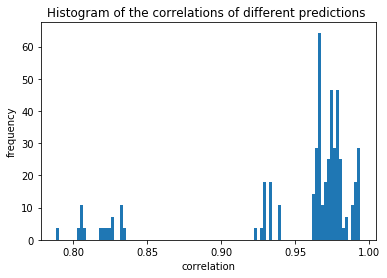

In [92]:
a = np.array(a).flatten()
plt.hist(a[abs(a)<1],bins=100,density=1)
plt.xlabel("correlation")
plt.ylabel("frequency")
plt.title("Histogram of the correlations of different predictions ")
plt.show()

In [93]:
concat_os = pd.DataFrame([])

for k in range(1,len(all_os_files)+1):
    f = all_os_files[k-1]
    out = pd.read_csv(os.path.join(OS_path, f))
    out.columns=["stack_"+str(k)]
    concat_os = pd.concat([concat_os,out],axis = 1)

n = concat_os.shape[1]
print(n)

17


### loading evaluation tools

In [94]:
def MAE_relative(y,pred):# assume input as arrays
    return abs(1-pred/y).mean()

data_IS=pd.read_csv("../data/IS/data_encoded_IS.csv")
IS_true_price=np.array(data_IS["price"])
data_OS = pd.read_csv("../data/OS/data_encoded_OS.csv")
OS_true_price = np.array(data_OS["price"])

#### Evaluate single prediction

In [95]:
IS_error = []
for k in range(1,n+1):
    s = "stack_"+str(k)
    is_error = MAE_relative(IS_true_price,np.array(concat_sub[s]))
    IS_error.append(is_error)
    os_error = MAE_relative(OS_true_price,np.array(concat_os[s]))
    print(s,",",all_os_files[k-1],":IS",round(is_error,4),", OS",round(os_error,4))

stack_1 , OS_prediction_cat_10,10.csv :IS 0.2386 , OS 0.2469
stack_2 , OS_prediction_cat_10,20.csv :IS 0.2384 , OS 0.2464
stack_3 , OS_prediction_cat_10,5.csv :IS 0.2384 , OS 0.2461
stack_4 , OS_prediction_cat_10,50.csv :IS 0.238 , OS 0.2468
stack_5 , OS_prediction_cat_split_type_final.csv :IS 0.2345 , OS 0.2365
stack_6 , OS_prediction_cat_split_type_final2.csv :IS 0.2332 , OS 0.2352
stack_7 , OS_prediction_dt_1.csv :IS 0.3103 , OS 0.2727
stack_8 , OS_prediction_lgb_10,100.csv :IS 0.2593 , OS 0.2606
stack_9 , OS_prediction_lgb_10,20.csv :IS 0.2529 , OS 0.2528
stack_10 , OS_prediction_lgb_10,40.csv :IS 0.2569 , OS 0.2563
stack_11 , OS_prediction_lgb_10,60.csv :IS 0.2578 , OS 0.2578
stack_12 , OS_prediction_lgb_split_type_final.csv :IS 0.255 , OS 0.2532
stack_13 , OS_prediction_xgb_10,20.csv :IS 0.2636 , OS 0.2701
stack_14 , OS_prediction_xgb_10,40.csv :IS 0.2701 , OS 0.2774
stack_15 , OS_prediction_xgb_10,60.csv :IS 0.2733 , OS 0.2803
stack_16 , OS_prediction_xgb_split_type_final.csv :I

### Simple ensembling

#### simple averaging

In [96]:
concat_sub["stacking_mean"] = concat_sub.mean(axis=1)
concat_os["stacking_mean"] = concat_os.mean(axis=1)
concat_sub["stacking_mean"].to_csv(f'{output_path}/stacking_mean_IS_'+version_control_name+".csv",index=False)
concat_os["stacking_mean"].to_csv(f'{output_path}/stacking_mean_OS_'+version_control_name+".csv",index=False)

In [97]:
print("IS Evaluation:",MAE_relative(IS_true_price,np.array(concat_sub["stacking_mean"])))
print("OS Evaluation:",MAE_relative(OS_true_price,np.array(concat_os["stacking_mean"])))

IS Evaluation: 0.23284212708965205
OS Evaluation: 0.24540790409153276


#### median

In [98]:
concat_sub["stacking_median"] = concat_sub.median(axis=1)
concat_os["stacking_median"] = concat_os.median(axis=1)
concat_sub["stacking_median"].to_csv(f'{output_path}/stacking_median_IS_'+version_control_name+".csv",index=False)
concat_os["stacking_median"].to_csv(f'{output_path}/stacking_median_OS_'+version_control_name+".csv",index=False)

In [99]:
print("IS Evaluation:",MAE_relative(IS_true_price,np.array(concat_sub["stacking_median"])))
print("OS Evaluation:",MAE_relative(OS_true_price,np.array(concat_os["stacking_median"])))

IS Evaluation: 0.22806327473878704
OS Evaluation: 0.2433906259760422


#### weighted averaging (based on IS error)

In [102]:
weights=1/np.array(IS_error)
is_weighted_average_pred = np.dot(np.array(concat_sub.iloc[:,range(len(all_os_files))]),weights.reshape(len(weights),1)).sum(axis=1)/weights.sum()
concat_sub["stacking_weighted_average"] = is_weighted_average_pred
os_weighted_average_pred = np.dot(np.array(concat_os.iloc[:,range(len(all_os_files))]),weights.reshape(len(weights),1)).sum(axis=1)/weights.sum()
concat_os["stacking_weighted_average"] = os_weighted_average_pred
concat_sub["stacking_weighted_average"].to_csv(f'{output_path}/stacking_weighted_average_IS_'+version_control_name+".csv",index=False)
concat_os["stacking_weighted_average"].to_csv(f'{output_path}/stacking_weighted_average_OS_'+version_control_name+".csv",index=False)

In [103]:
print("IS Evaluation:",MAE_relative(IS_true_price,np.array(concat_sub["stacking_weighted_average"])))
print("OS Evaluation:",MAE_relative(OS_true_price,np.array(concat_os["stacking_weighted_average"])))

IS Evaluation: 0.23202786987343954
OS Evaluation: 0.24464044721939687


### Stack with linear model

In [104]:
train_proportion = 0.5

index_list=[i for i in range(len(concat_sub))]

random.shuffle(index_list)
train_list=index_list[:round(len(concat_sub)*train_proportion)]
test_list=index_list[round(len(concat_sub)*train_proportion):]

# the following variable records the features of examples in the training set
x_is_train= np.array(concat_sub.iloc[train_list,range(n)])
# the following variable records the features of examples in the test set
x_is_cv= np.array(concat_sub.iloc[test_list,range(n)])
# the following variable records the labels of examples in the training set
y_is_train=IS_true_price[train_list]
# the following variable records the labels of examples in the test set
y_is_cv=IS_true_price[test_list]
print(len(x_is_train))
print(len(x_is_cv))

210358
210357


#### Ridge Regression

In [105]:
model_ridge=Ridge(alpha=5,fit_intercept=True)
model_ridge.fit(x_is_train,y_is_train)
print("coef:",np.array(model_ridge.coef_))
print("intercept:",np.array(model_ridge.intercept_))
train_pred = model_ridge.predict(x_is_train)
test_pred = model_ridge.predict(x_is_cv)
os_pred = model_ridge.predict(np.array(concat_os.iloc[:,range(n)]))
train_mae = MAE_relative(y_is_train,train_pred)
test_mae = MAE_relative(y_is_cv,test_pred)
os_mae = MAE_relative(OS_true_price,os_pred)

concat_sub["stacking_ridge_regr"] = -1
concat_sub["stacking_ridge_regr"].iloc[train_list] = train_pred
concat_sub["stacking_ridge_regr"].iloc[test_list] = test_pred
concat_os["stacking_ridge_regr"] = os_pred
concat_sub["stacking_ridge_regr"].to_csv(f'{output_path}/stacking_ridge_regr_IS_'+version_control_name+".csv",index=False)
concat_os["stacking_ridge_regr"].to_csv(f'{output_path}/stacking_ridge_regr_OS_'+version_control_name+".csv",index=False)

print("Train relative error:",round(train_mae,4))
print("Test relative error:",round(test_mae,4))
print("Out-of-sample relative error:",round(os_mae,4))

coef: [-0.0522548   0.03550283 -0.02546687 -0.08175744  0.09842645  0.19160913
  0.07933581  0.0750583   0.14926986  0.04894111  0.09556859  0.23400851
  0.22317413  0.02966876 -0.05017236 -0.04453015  0.00407207]
intercept: -129.2067214394374
Train relative error: 0.2305
Test relative error: 0.2304
Out-of-sample relative error: 0.2394


#### Elastic Net

In [106]:
regr = ElasticNet(l1_ratio=0.3, alpha=1)
regr.fit(x_is_train, y_is_train)
print("coef:",regr.coef_)
print("intercept",regr.intercept_)
train_pred = regr.predict(x_is_train)
test_pred = regr.predict(x_is_cv)
os_pred = regr.predict(np.array(concat_os.iloc[:,range(n)]))
train_mae = MAE_relative(y_is_train,train_pred)
cv_mae = MAE_relative(y_is_cv,test_pred)
os_mae = MAE_relative(OS_true_price,os_pred)

concat_sub["stacking_elastic_net_regr"] = -1
concat_sub["stacking_elastic_net_regr"].iloc[train_list] = train_pred
concat_sub["stacking_elastic_net_regr"].iloc[test_list] = test_pred
concat_os["stacking_elastic_net_regr"] = os_pred
concat_sub["stacking_elastic_net_regr"].to_csv(f'{output_path}/stacking_ridge_regr_IS_'+version_control_name+".csv",index=False)
concat_os["stacking_elastic_net_regr"].to_csv(f'{output_path}/stacking_ridge_regr_OS_'+version_control_name+".csv",index=False)


print("Train relative error:",round(train_mae,4))
print("Test relative error:",round(test_mae,4))
print("Out-of-sample relative error:",round(os_mae,4))

coef: [-0.05262902  0.03512144 -0.02522358 -0.0813945   0.09850197  0.19161928
  0.07933759  0.07485117  0.14863358  0.04880966  0.09605117  0.23435372
  0.22354289  0.02983651 -0.05026212 -0.04476596  0.00406905]
intercept -129.2182449941556
Train relative error: 0.2305
Test relative error: 0.2304
Out-of-sample relative error: 0.2394


### Evaluate on clean samples

In [107]:
data_OS_clean = data_OS.dropna(how="any")
OS_true_price_clean = np.array(data_OS_clean["price"])

for j in range(n,len(concat_os.columns)):
    clean_err = MAE_relative(OS_true_price_clean,np.array(concat_os.iloc[data_OS_clean.index,j]))
    print(concat_os.columns[j],":",clean_err)

stacking_mean : 0.20189018173572623
stacking_median : 0.20008881934935693
stacking_weighted_average : 0.2012766806488203
stacking_ridge_regr : 0.193375244741408
stacking_elastic_net_regr : 0.19337716442982228


In [100]:
import matplotlib.pyplot as plt

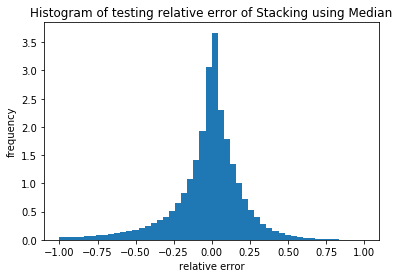

In [108]:
error_seq = 1-np.array(concat_sub["stacking_median"])/IS_true_price
plt.hist(error_seq[abs(error_seq)<1],bins=50,density=1)
plt.xlabel("relative error")
plt.ylabel("frequency")
plt.title("Histogram of testing relative error of Stacking using Median")
plt.show()

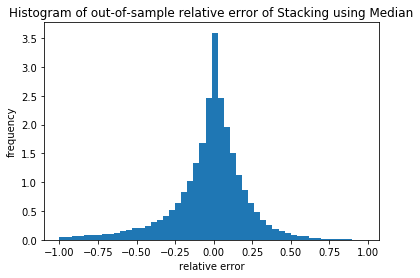

In [110]:
error_seq = 1-np.array(concat_os["stacking_median"])/OS_true_price
plt.hist(error_seq[abs(error_seq)<1],bins=50,density=1)
plt.xlabel("relative error")
plt.ylabel("frequency")
plt.title("Histogram of out-of-sample relative error of Stacking using Median")
plt.show()

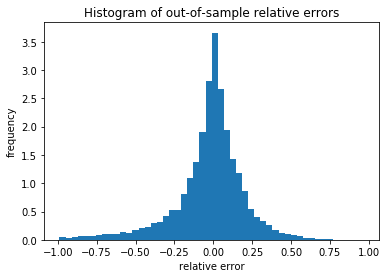

In [113]:
error_seq = 1-np.array(concat_os.iloc[data_OS_clean.index,j])/OS_true_price_clean
plt.hist(error_seq[abs(error_seq)<1],bins=50,density=1)
plt.xlabel("relative error")
plt.ylabel("frequency")
plt.title("Histogram of out-of-sample relative errors")
plt.show()